In [98]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [81]:
env = gym.make('FrozenLake-v1')

In [172]:
def q_learn(env, Q=None, alpha=0.1, gamma=0.99, epsilon=1, episodes=5000, steps=100,
            debug=False):

    num_act = env.action_space.n
    num_states = env.observation_space.n
    if not Q:
        Q = np.zeros((num_states, num_act))

    ep_rewards = []
    ep_avg_steps = []
    ep100_steps_to_goal = []
    for i in range(episodes):
        s = env.reset()
        count_steps = 0
        count_rewards = 0

        for j in range(steps):
            count_steps += 1
            a = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(Q[s, :])

            s_tag, r, done, _ = env.step(a)
            if done:
                if r > 0:
                    if debug:
                        print(f"done - episode {i} took - {count_steps} steps")
                    ep100_steps_to_goal.append(count_steps)
                    count_steps = 0
                    count_rewards += 1
                target = r
                s_tag = env.reset()
            else:
                target = r + gamma * max(Q[s_tag, :])
            Q[s, a] = (1 - alpha) * Q[s, a] + alpha * target
            s = s_tag

        if debug and np.sum(Q) > 0:
            print(Q)

        ep_rewards.append(count_rewards)

        # saves the avarage number of steps to goal in last 100 episodes
        if i % 100 == 99:
            if debug:
                print(f"Episode {i} - steps to goal -\n{ep100_steps_to_goal}")
            if ep100_steps_to_goal:
                ep_avg_steps.append(np.mean(ep100_steps_to_goal))
            else:
                ep_avg_steps.append(100)
            ep100_steps_to_goal = []

        # decaing e-greedy by 2 factor
        epsilon /= 1.1

    return Q, ep_rewards, ep_avg_steps

In [34]:
for i in range(30):
    Q_learn(env, Q, alpha=0.1, gamma, epsilon, episodes=10,steps=100):

In [174]:
Q, ep_rewars, ep_avg_steps = Q_learn(env,epsilon=0.5)

In [171]:
ep_rewars[:-100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 3,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 2,
 1,
 0,
 3,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,


In [175]:
ep_avg_steps

[39.23728813559322,
 39.6875,
 46.01162790697674,
 44.890243902439025,
 41.7816091954023,
 40.69230769230769,
 41.91860465116279,
 45.857142857142854,
 40.70652173913044,
 37.78481012658228,
 44.582417582417584,
 44.204819277108435,
 40.28421052631579,
 43.4320987654321,
 40.17045454545455,
 40.19512195121951,
 40.48245614035088,
 40.119565217391305,
 41.641304347826086,
 39.16161616161616,
 39.55,
 43.310344827586206,
 41.833333333333336,
 42.4367816091954,
 44.02469135802469,
 44.48888888888889,
 45.36470588235294,
 47.39705882352941,
 38.93069306930693,
 38.57142857142857,
 41.604395604395606,
 41.58227848101266,
 40.9,
 42.561797752808985,
 39.282828282828284,
 42.043010752688176,
 37.33695652173913,
 37.342592592592595,
 44.0,
 44.239583333333336,
 42.390243902439025,
 45.0,
 43.77906976744186,
 38.754901960784316,
 42.142857142857146,
 41.41573033707865,
 47.693333333333335,
 38.74,
 45.3875,
 43.404761904761905]

In [85]:
Q_500, _ = Q_learn(env, episodes=5)
print("Q after 500 steps:",Q_500,sep='\n')

Q_2000, _  = Q_learn(env, episodes=20)
print("Q after 2000 steps:",Q_2000,sep='\n')

Q after 500 steps:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]
Q after 2000 steps:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]


In [141]:
Q_full,ep_rewars,ep_avg_steps = Q_learn(env,debug=True)

Episode 99 - steps to goal -
[]
Episode 199 - steps to goal -
[]
Episode 299 - steps to goal -
[]
Episode 399 - steps to goal -
[]
Episode 499 - steps to goal -
[]
Episode 599 - steps to goal -
[]
Episode 699 - steps to goal -
[]
Episode 799 - steps to goal -
[]
Episode 899 - steps to goal -
[]
Episode 999 - steps to goal -
[]
Episode 1099 - steps to goal -
[]
Episode 1199 - steps to goal -
[]
Episode 1299 - steps to goal -
[]
Episode 1399 - steps to goal -
[]
Episode 1499 - steps to goal -
[]
Episode 1599 - steps to goal -
[]
Episode 1699 - steps to goal -
[]
Episode 1799 - steps to goal -
[]
Episode 1899 - steps to goal -
[]
Episode 1999 - steps to goal -
[]
Episode 2099 - steps to goal -
[]
Episode 2199 - steps to goal -
[]
Episode 2299 - steps to goal -
[]
Episode 2399 - steps to goal -
[]
Episode 2499 - steps to goal -
[]
Episode 2599 - steps to goal -
[]
Episode 2699 - steps to goal -
[]
Episode 2799 - steps to goal -
[]
Episode 2899 - steps to goal -
[]
Episode 2999 - steps to g

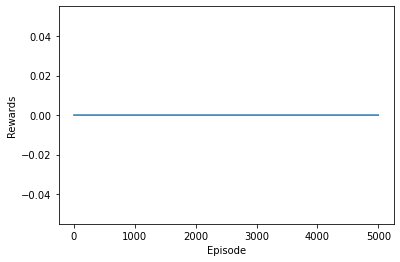

In [143]:
plt.plot(np.arange(5000),ep_rewars)
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.show()

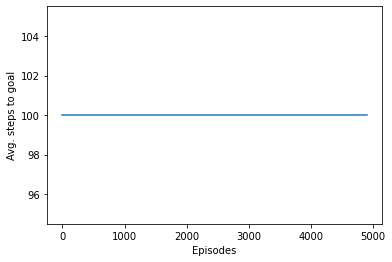

In [144]:
plt.plot(np.arange(50)*100,ep_avg_steps)
plt.xlabel("Episodes")
plt.ylabel("Avg. steps to goal")
plt.show()

In [ ]:
dd